@author Nassir Mohammad

# Preliminaries

In [1]:
# %% setup

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from pyod.models.pca import PCA
from pyod.models.mcd import MCD
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import loadmat
import numpy as np

import sys
sys.path.append('../')
sys.path.append('../scripts')
from scripts.rendering_functions import highlight_max, highlight_min  
from scripts.utilities import show_results  
from scripts.utilities import apply_classifiers, format_df 
from perception_nassir import Perception 

image_save_path = ''
image_save_switch = False

# ex8data1

Dataset taken from: Andrew Ng. Machine learning: Programming Exercise 8: Anomaly Detection and Recommender Systems. 2012.

## Read and explore the data

In [2]:
path = r"../data/ex8data1.mat"
data = loadmat(path)
X = data['X']
X_val = data['Xval']
y_val = data['yval']

# show the headers
for key, val in data.items():
    print(key)
    
print("The shape of X is: {}".format(X.shape))
print("The shape of X_val is: {}".format(X_val.shape))
print("The shape of y is: {}".format(y_val.sum()))

__header__
__version__
__globals__
X
Xval
yval
The shape of X is: (307, 2)
The shape of X_val is: (307, 2)
The shape of y is: 9


### Standardise the validation data only (training data not used)

In [4]:
sc = StandardScaler()
sc.fit(X_val)
X_val = sc.transform(X_val)

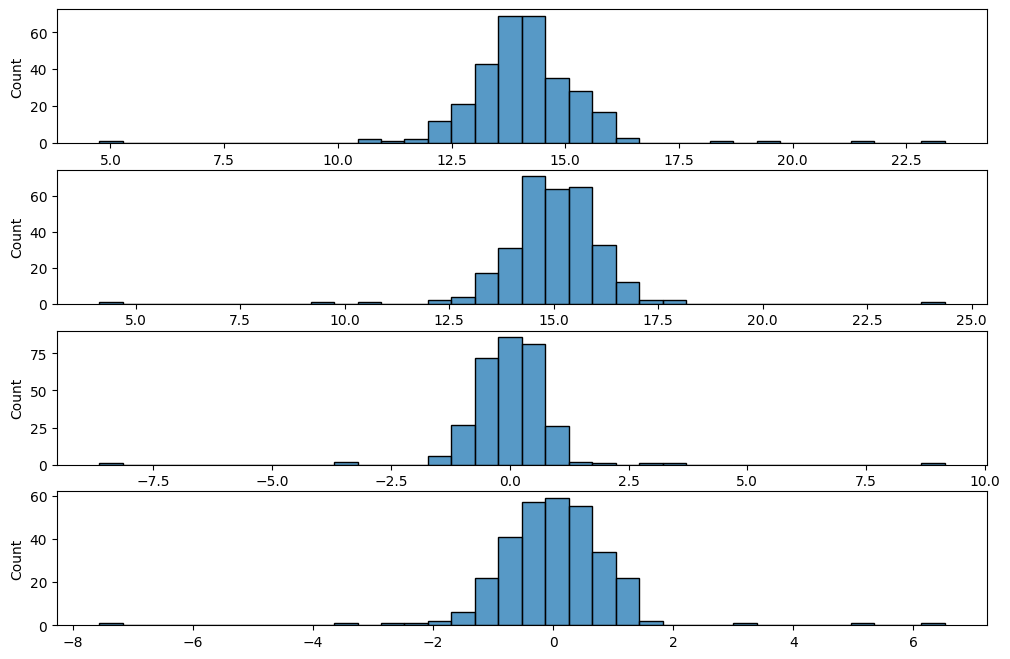

In [5]:
#sns.set_theme()
fig, axs = plt.subplots(4, figsize=(12,8))
sns.histplot(data=X[:,0], ax=axs[0]);
sns.histplot(data=X[:,1], ax=axs[1]);
sns.histplot(data=X_val[:,0], ax=axs[2]);
sns.histplot(data=X_val[:,1], ax=axs[3]);
plt.show()

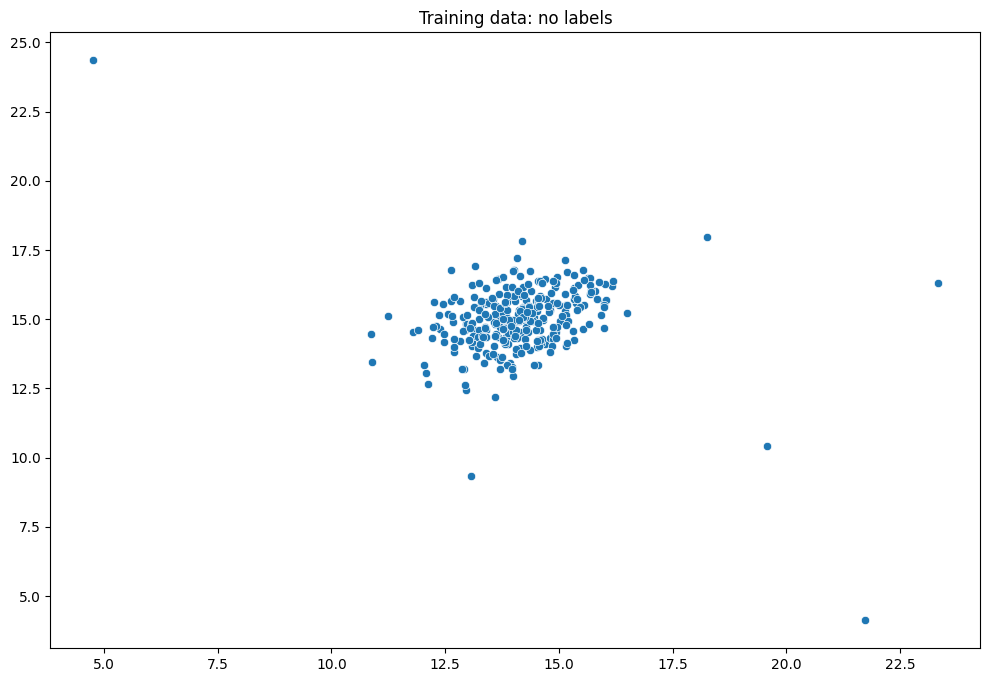

In [6]:
fig, ax = plt.subplots(figsize=(12,8));
ax = sns.scatterplot(x=X[:,0], y=X[:,1]);
ax.set_title("Training data: no labels");
plt.show()

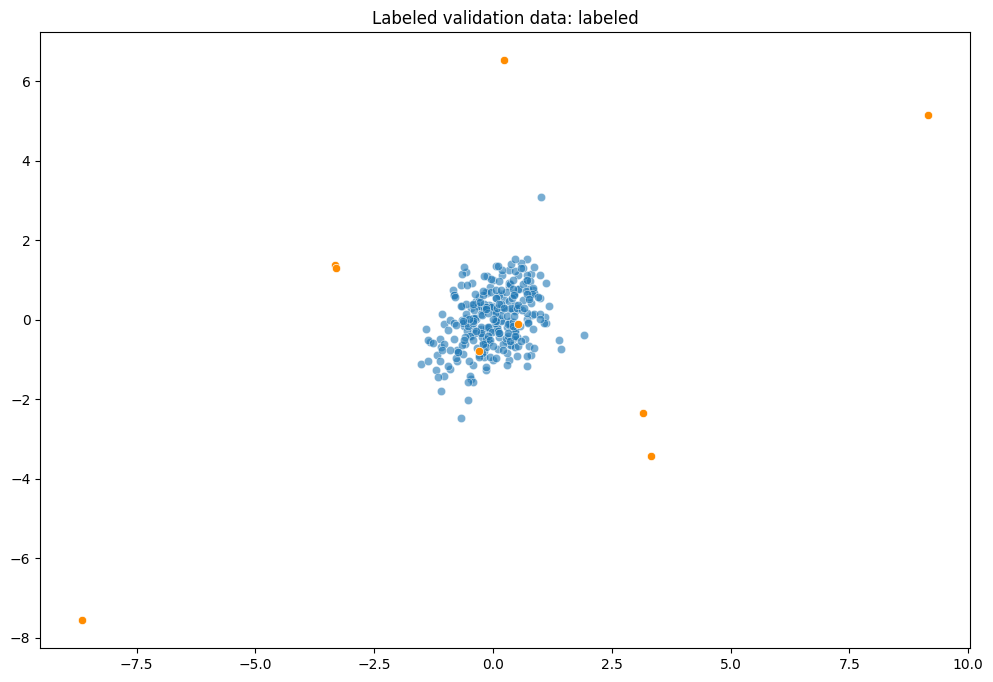

In [7]:
X_val_anomalies = X_val[np.where(y_val==1)[0]]
X_val_normal = X_val[np.where(y_val==0)[0]]

fig, ax = plt.subplots(figsize=(12,8))
ax = sns.scatterplot(x=X_val_normal[:,0], y=X_val_normal[:,1], alpha=0.6)
ax = sns.scatterplot(x=X_val_anomalies[:,0], y=X_val_anomalies[:,1], 
                     color='darkorange', alpha=1)
ax.set_title("Labeled validation data: labeled");
plt.show()

# Apply individual models

### MCD

              precision    recall  f1-score   support

      normal       0.99      0.92      0.95       298
    abnormal       0.23      0.78      0.35         9

    accuracy                           0.92       307
   macro avg       0.61      0.85      0.65       307
weighted avg       0.97      0.92      0.94       307

auc score: 0.8747203579418344


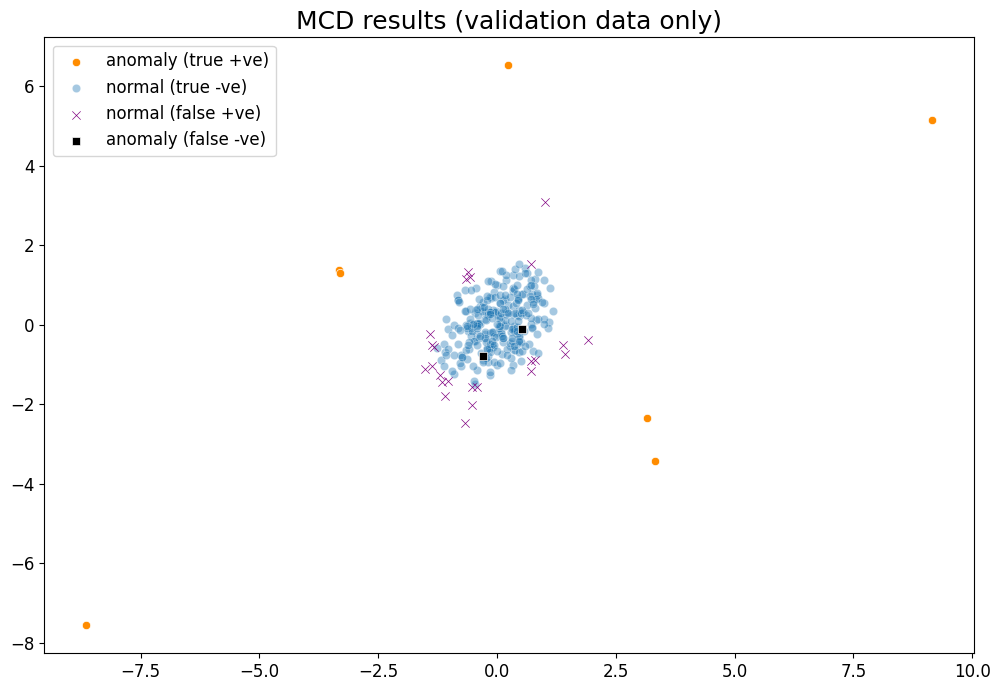

In [8]:
clf_mcd = MCD()
clf_mcd.fit(X_val)
validation_labels = clf_mcd.predict(X_val)
scores = clf_mcd.decision_function(X_val)

show_results(X_val, y_val, validation_labels,
             font_size="12",
             file_to_save=image_save_path + 'ex8data1_validation_mcd.png',
             figure_title="MCD results (validation data only)",
             decision_scores=scores,
             save_switch=image_save_switch)
plt.show()

### PCA 

              precision    recall  f1-score   support

      normal       0.99      0.92      0.95       298
    abnormal       0.23      0.78      0.35         9

    accuracy                           0.92       307
   macro avg       0.61      0.85      0.65       307
weighted avg       0.97      0.92      0.94       307

auc score: 0.9336316181953765


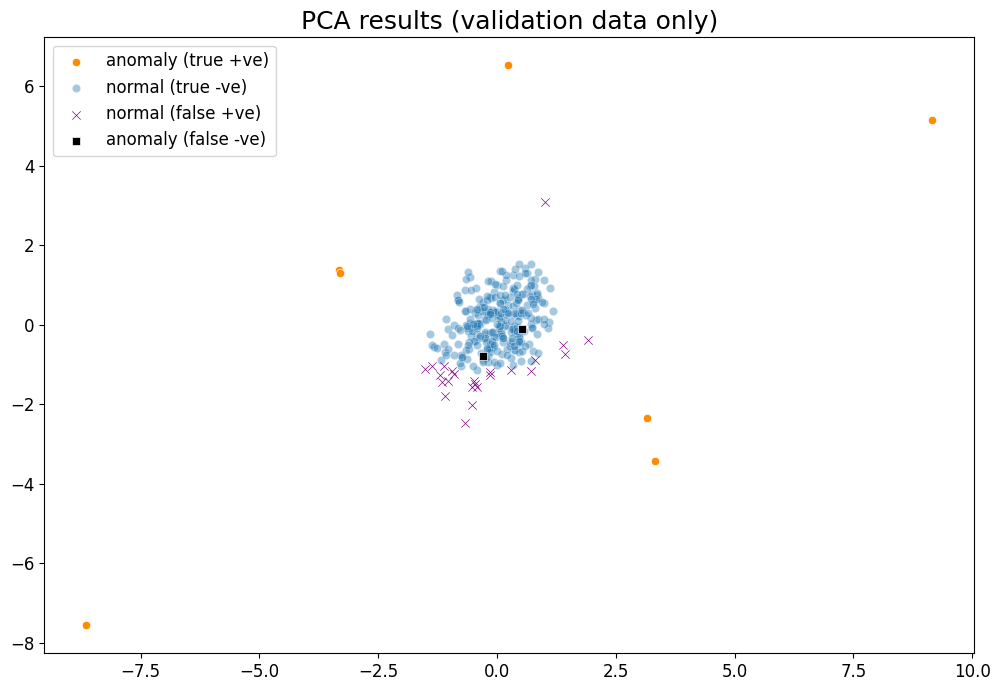

In [9]:
clf_pca = PCA(n_selected_components=2)
clf_pca.fit(X_val)
validation_labels = clf_pca.predict(X_val)
scores = clf_pca.decision_function(X_val)

show_results(X_val, y_val, validation_labels,
             font_size="12",
             file_to_save=image_save_path + 'ex8data1_validation_pca.png',
             figure_title="PCA results (validation data only)",
             decision_scores=scores,
             save_switch=image_save_switch)
plt.show()

### Perception 

              precision    recall  f1-score   support

      normal       0.99      0.99      0.99       298
    abnormal       0.64      0.78      0.70         9

    accuracy                           0.98       307
   macro avg       0.81      0.88      0.84       307
weighted avg       0.98      0.98      0.98       307

auc score: 0.9343773303504848


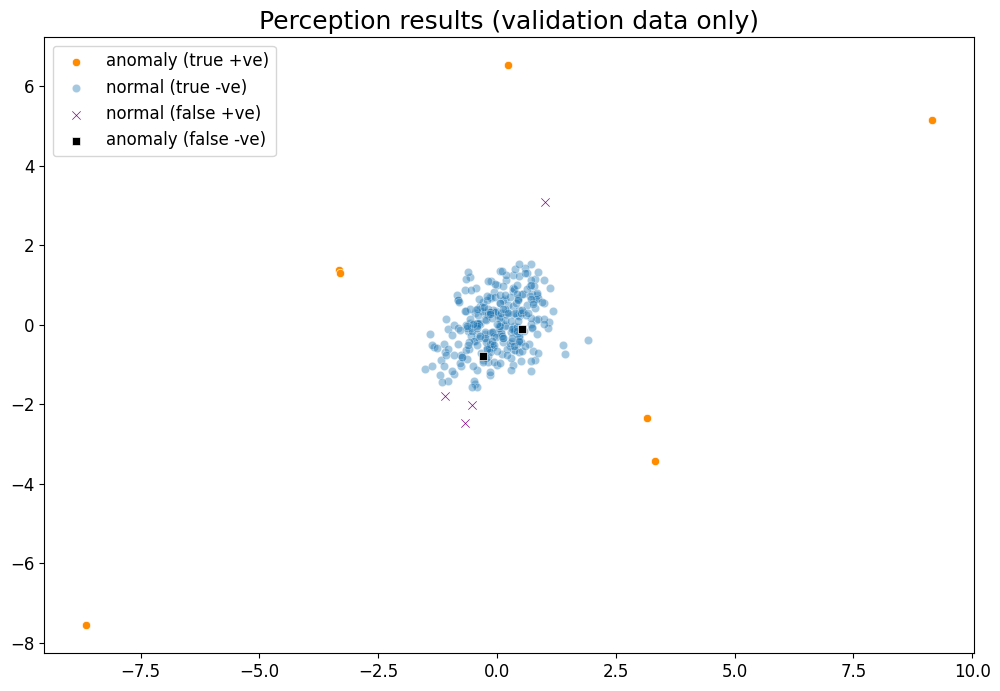

In [10]:
clf_perception = Perception()
clf_perception.fit(X_val)
validation_labels = clf_perception.predict(X_val)

show_results(X_val, y_val, validation_labels,
             font_size="12",
             file_to_save=image_save_path + 'ex8data1_validation_perception.png',
             figure_title="Perception results (validation data only)",
             decision_scores=clf_perception.scores_,
             save_switch=image_save_switch)

### DBSCAN

In [11]:
# test example
X = np.array([[1, 2], [2, 2], [2, 3],
              [8, 7], [8, 8], [25, 80]])
clustering = DBSCAN(eps=3, min_samples=2).fit(X)

print(clustering.labels_)

[ 0  0  0  1  1 -1]


              precision    recall  f1-score   support

      normal       0.99      0.99      0.99       298
    abnormal       0.64      0.78      0.70         9

    accuracy                           0.98       307
   macro avg       0.81      0.88      0.84       307
weighted avg       0.98      0.98      0.98       307

auc score: 0.8821774794929157


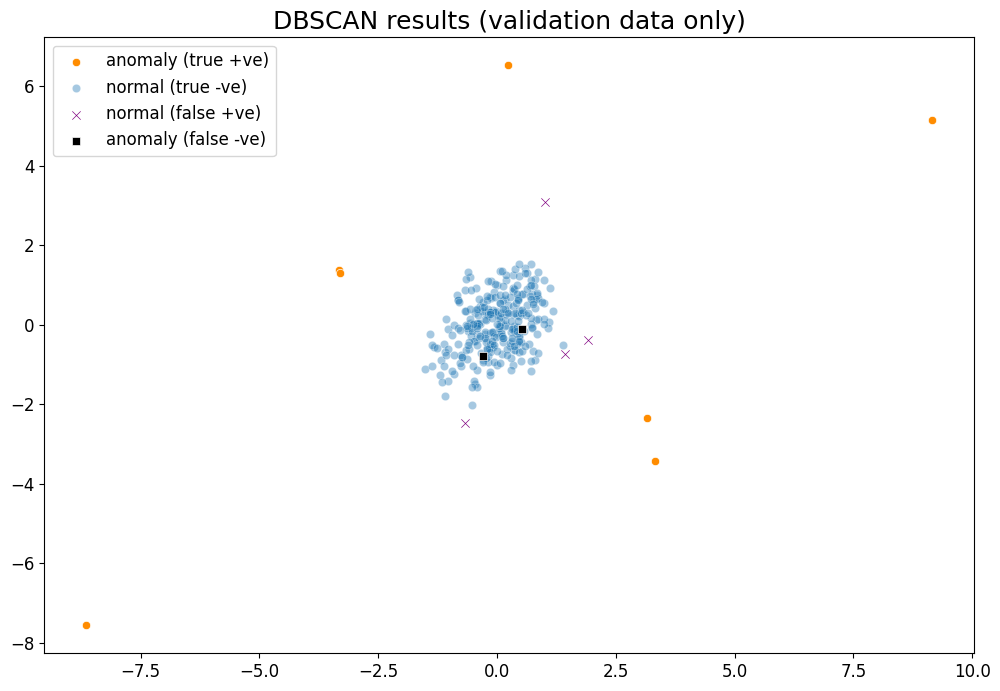

In [12]:
# try DBSCAN method using default parameters. Gives good results on this dataset, but
# not on others.
clf_dbscan = DBSCAN()
clustering = clf_dbscan.fit(X_val)

validation_labels = clustering.labels_

validation_labels = np.where(validation_labels==-1, 1, 0)

show_results(X_val, y_val, validation_labels, font_size="12",
             file_to_save=image_save_path + 'ex8data1_validation_dbscan.png',
             figure_title="DBSCAN results (validation data only)",
             decision_scores=None,
             save_switch=image_save_switch)
plt.show()

In [13]:
dataset_name = 'ex8data1'
classifiers = [
    'HBOS',  # to be ignored, first run in loop slower
    'HBOS',
    'IForest',
    'KNN',
    'LOF',
    'MCD',
    'OCSVM',
    'Perception',
    'DBSCAN',
]

df_temp = apply_classifiers(classifiers, dataset_name,
                       predict_data=X_val,
                       predict_labels=y_val,
                       train_data=X_val)

df = format_df(df_temp)

current classifier in progress: HBOS
total run time: 2.608519500005059
current classifier in progress: HBOS
total run time: 0.0007508998969569802
current classifier in progress: IForest
total run time: 0.11707310006022453
current classifier in progress: KNN
total run time: 0.029597700224258006
current classifier in progress: LOF
total run time: 0.004283899907022715
current classifier in progress: MCD
total run time: 0.021239300025627017
current classifier in progress: OCSVM
total run time: 0.011682100011967123
current classifier in progress: Perception
total run time: 0.0009818000253289938
current classifier in progress: DBSCAN
total run time: 0.001741899992339313


In [ ]:
# highlight dataframe max/min
cols = ['Precision', 'Recall', 'F1', 'AUC']
formatdict = {}
for col in cols: formatdict[col] = "{:.2f}"
formatdict.pop('Classifier', None)
formatdict['Runtime'] = "{:.5f}"
    
metrics_df_styled = df.style.hide().apply(highlight_max, 
                                                 subset=['Precision', 'Recall', 'F1', 
                                                         'AUC']).\
apply(highlight_min, subset=['Runtime']).format(formatdict)
metrics_df_styled
print(df)

Classifier,Precision,Recall,F1,AUC,Runtime
HBOS,0.23,0.78,0.36,0.92,0.00075
IForest,0.23,0.78,0.35,0.87,0.11707
KNN,0.29,0.78,0.42,0.85,0.02960
LOF,0.23,0.78,0.36,0.88,0.00428
MCD,0.23,0.78,0.35,0.87,0.02124
OCSVM,0.23,0.78,0.35,0.87,0.01168
Perception,0.64,0.78,0.70,0.93,0.00098
DBSCAN,0.64,0.78,0.70,0.88,0.00174


In [ ]:
# save dataframe as image (if required)
# title_img = 'Anomaly detection results on dataset ex8data1'    
# path = image_save_path + 'ex8data1_validation_table.png'

# dfi.export(metrics_df_styled,path)